<a href="https://colab.research.google.com/github/Superkid0714/GCA_Mini-Project_20240719/blob/main/Wine_quality_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_(%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [2]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [3]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')

#     # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [6]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [7]:
# Tensorflow
import tensorflow as tf

tf.__version__

'2.15.0'

In [8]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization

from tensorflow.keras import optimizers, regularizers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tensorflow.keras.utils import plot_model

In [9]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [10]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [11]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

## Wine quality 예측 모델

### 1. 데이터 수집
* DataFrame 생성
* DataFrame 기본 정보 생성

In [12]:
wine = pd.read_csv ('wine.csv', index_col = 0)

In [13]:
wine.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [14]:
wine.tail()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
5492,5,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white
5496,6,7.0,0.35,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,white


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [17]:
wine.dtypes

quality                   int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
type                     object
dtype: object

### 2. 데이터 전처리

* 결측치 확인

In [18]:
wine.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

* 중복값 확인

In [19]:
wine.duplicated().sum()

858

* 이상치 확인

In [20]:
# 이상치는 중앙값을 크게 벗어난 값 (중앙값 기준 1.5배 넘어가는 값)
# IQR : 1사분위수와 3사분위수의 차이값

# 1사분위수 - (1.5)IQR
# 3사분위수 + (1.5)IQR

# 이상치 기준값 제공 함수
def outlier_criteria(x,column):
  # 01(1사분위수), 03(3사분위수) 구하기
  q1 = x[column].quantile(0.25)
  q3 = x[column].quantile(0.75)

  # 이상치 : 1.5 * IQT (Q3 - Q1)
  iqr = 1.5 * ( q3 - q1 )

  iqr1 = q1 - iqr
  iqr3 = q3 + iqr

  return(iqr1,iqr3)

# 이상치 대체값 설정 함수
def change_outlier(data,column):
  x = data.copy()

  # 이상치 기준값 계산
  iqr1, iqr3 = outlier_criteria(x,column)

  # 이상치 대체값 설정
  standard_min = 0
  if iqr1 > 0:
    change_min = iqr1
  standard_max =iqr3

  # 이상치 대체
  x.loc[(x[column] > standard_max), column] =standard_max
  x.loc[(x[column] < standard_min),column] = standard_min

  return x

def print_outlier(x,column):
  # 이상치 기준값 개선
  iqr1, iqr3 = outlier_criteria(x,column)

  print(f'이상치 기준값 : {round(iqr1,3)},{round(iqr3,3)}\n')
  outlier = list(x[(x[column] > iqr3) | (x[column]<iqr1)][column])

  print(f'{column} 변수 이상치\n')
  print(outlier)
  print(f'\n{column} 변수 이상치 개수 : {len(outlier)}개')

* quality : 품질




In [21]:
wine['quality'].describe()

count    5497.000000
mean        5.818992
std         0.870311
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [22]:
wine['quality'].value_counts()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

<Axes: >

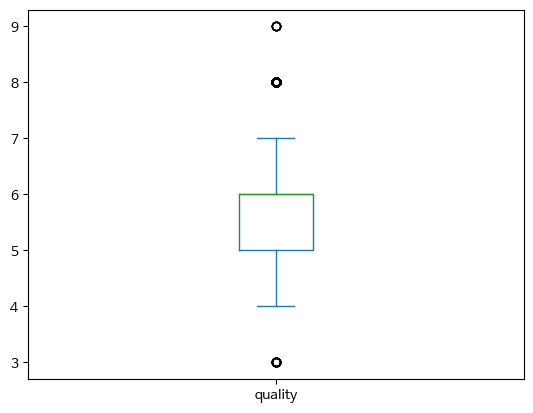

In [23]:
wine['quality'].plot(kind='box')

In [24]:
print_outlier(wine,'quality')

이상치 기준값 : 3.5,7.5

quality 변수 이상치

[8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 3, 3, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8, 8, 8, 9, 3, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 3, 3, 8, 8, 3, 8, 8]

quality 변수 이상치 개수 : 183개


* fixed acidity : 결합산도

In [25]:
wine['fixed acidity'].describe()

count    5497.000000
mean        7.210115
std         1.287579
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [26]:
wine['fixed acidity'].unique()

array([ 5.6 ,  8.8 ,  7.9 ,  7.  ,  7.8 ,  6.  ,  6.1 ,  7.1 ,  6.8 ,
        8.  ,  6.2 ,  7.3 , 12.5 ,  6.5 ,  8.2 ,  7.6 ,  7.2 ,  7.7 ,
        8.9 ,  6.6 ,  6.3 ,  6.4 ,  5.9 ,  9.9 ,  8.7 ,  7.5 ,  7.4 ,
        6.9 , 10.2 , 10.7 ,  8.4 ,  8.3 , 10.  ,  5.2 ,  8.6 ,  5.7 ,
        5.  ,  9.3 , 11.9 ,  8.5 ,  5.5 ,  4.9 ,  5.8 ,  6.7 ,  9.1 ,
       10.4 ,  9.5 ,  5.4 , 15.5 , 12.6 ,  5.3 ,  4.7 ,  8.1 , 11.3 ,
       11.6 ,  9.2 , 10.6 , 10.9 ,  4.6 ,  9.7 ,  9.  ,  9.8 , 11.1 ,
       11.8 , 11.5 ,  9.6 ,  5.1 , 14.3 , 10.1 , 10.8 , 10.3 , 11.  ,
        6.45, 12.8 , 12.1 , 12.9 , 13.3 ,  9.4 ,  4.4 , 12.7 , 13.7 ,
       10.5 ,  4.8 , 12.3 , 12.  , 15.6 , 12.2 , 13.5 , 11.2 , 12.4 ,
       14.  ,  6.15, 15.  , 13.4 , 13.8 , 11.7 , 13.  , 15.9 , 13.2 ,
       11.4 , 14.2 ,  3.9 ,  3.8 ,  7.15,  4.2 ,  4.5 ])

<Axes: >

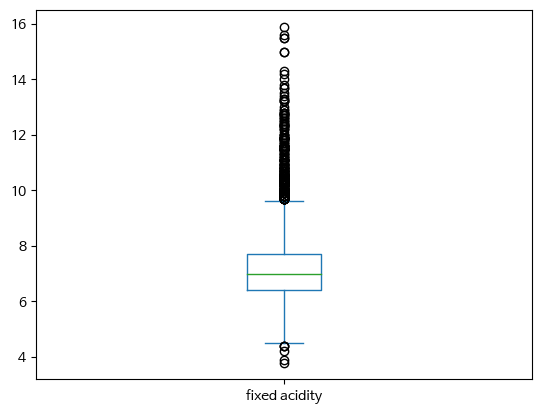

In [27]:
wine['fixed acidity'].plot(kind='box')

In [28]:
print_outlier(wine,'fixed acidity')

이상치 기준값 : 4.45,9.65

fixed acidity 변수 이상치

[12.5, 9.9, 10.2, 10.7, 10.0, 11.9, 10.4, 9.9, 15.5, 12.6, 9.9, 11.3, 11.6, 10.6, 10.9, 12.5, 10.0, 9.7, 10.4, 11.9, 10.6, 9.8, 11.1, 10.2, 11.8, 11.5, 11.5, 9.9, 11.5, 9.9, 10.0, 14.3, 10.1, 10.8, 11.1, 10.4, 12.6, 10.2, 10.3, 10.0, 10.3, 9.8, 11.0, 10.9, 9.8, 12.8, 12.1, 12.9, 13.3, 9.9, 10.8, 9.7, 11.6, 10.4, 4.4, 10.4, 9.9, 11.6, 10.4, 9.8, 12.7, 11.1, 13.7, 11.5, 10.0, 10.5, 10.4, 10.5, 9.9, 12.3, 12.0, 10.0, 9.7, 10.4, 9.8, 10.7, 9.8, 11.1, 15.6, 10.7, 10.5, 10.4, 11.1, 11.9, 12.0, 10.3, 12.2, 13.5, 11.6, 10.4, 4.4, 11.9, 9.8, 10.4, 9.8, 12.0, 11.2, 10.5, 9.8, 9.9, 10.3, 12.4, 10.0, 9.7, 10.2, 10.2, 10.0, 9.9, 10.1, 11.8, 9.7, 10.3, 10.6, 12.2, 9.7, 10.2, 11.1, 9.7, 12.8, 10.0, 10.2, 12.4, 11.5, 11.9, 10.7, 14.0, 9.8, 11.9, 13.3, 10.6, 15.0, 10.9, 9.9, 4.4, 10.9, 10.3, 10.8, 12.9, 13.4, 10.7, 9.8, 9.8, 10.7, 13.7, 15.0, 9.9, 13.8, 11.7, 11.0, 10.0, 10.5, 10.5, 10.4, 10.1, 13.0, 15.9, 13.2, 10.6, 13.2, 12.7, 10.2, 10.9, 10.0, 11.4, 10.4, 

* volatile acidity : 휘발성산

In [29]:
wine['volatile acidity'].describe()

count    5497.000000
mean        0.338163
std         0.163224
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64

In [30]:
wine['volatile acidity'].unique()

array([0.695, 0.61 , 0.21 , 0.4  , 0.19 , 0.22 , 0.38 , 0.24 , 0.39 ,
       0.18 , 0.16 , 0.33 , 0.31 , 0.49 , 0.37 , 0.28 , 0.23 , 0.56 ,
       0.715, 0.75 , 0.29 , 0.36 , 0.41 , 0.26 , 0.44 , 0.59 , 0.27 ,
       0.735, 0.32 , 0.74 , 0.6  , 0.305, 0.46 , 0.54 , 0.53 , 0.295,
       0.43 , 0.34 , 0.69 , 0.1  , 0.405, 0.2  , 0.3  , 0.58 , 0.17 ,
       0.25 , 0.785, 0.12 , 0.335, 0.15 , 0.35 , 0.775, 0.64 , 0.5  ,
       0.385, 0.68 , 0.145, 0.48 , 0.55 , 0.67 , 0.62 , 0.365, 0.63 ,
       0.645, 0.78 , 0.84 , 0.875, 0.13 , 0.125, 0.45 , 0.275, 0.14 ,
       0.745, 0.52 , 0.255, 0.76 , 0.83 , 0.345, 0.57 , 0.51 , 0.175,
       0.47 , 0.165, 0.11 , 0.7  , 0.265, 0.915, 0.42 , 0.545, 1.04 ,
       0.685, 1.13 , 0.89 , 0.66 , 0.565, 0.835, 0.245, 0.82 , 0.475,
       0.65 , 0.91 , 1.33 , 0.555, 0.765, 0.72 , 0.795, 0.92 , 0.08 ,
       0.895, 0.585, 0.395, 0.77 , 0.8  , 0.615, 0.415, 0.105, 0.815,
       0.73 , 0.205, 0.88 , 0.655, 0.98 , 0.965, 1.18 , 0.185, 1.115,
       0.725, 0.9  ,

<Axes: >

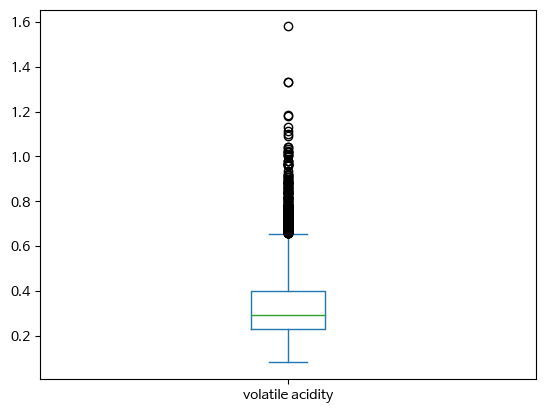

In [31]:
wine ['volatile acidity'].plot(kind = 'box')

In [32]:
print_outlier(wine, 'volatile acidity')

이상치 기준값 : -0.025,0.655

volatile acidity 변수 이상치

[0.695, 0.715, 0.75, 0.75, 0.735, 0.74, 0.69, 0.695, 0.69, 0.785, 0.775, 0.68, 0.67, 0.78, 0.735, 0.75, 0.785, 0.84, 0.875, 0.67, 0.745, 0.69, 0.76, 0.695, 0.715, 0.83, 0.775, 0.67, 0.69, 0.76, 0.7, 0.915, 0.68, 0.69, 1.04, 0.685, 0.74, 1.13, 0.89, 0.66, 0.835, 0.82, 0.91, 0.66, 1.33, 0.84, 0.765, 0.745, 0.685, 0.72, 0.795, 0.69, 0.67, 0.685, 0.92, 0.895, 0.765, 0.785, 0.67, 0.77, 0.78, 0.68, 0.8, 0.685, 0.82, 0.72, 0.76, 0.67, 0.76, 0.66, 0.685, 0.74, 0.66, 0.815, 0.73, 0.66, 0.785, 0.88, 0.73, 0.98, 0.68, 0.715, 0.68, 0.67, 0.965, 0.78, 1.18, 0.66, 0.685, 1.115, 0.695, 0.725, 0.685, 0.66, 0.69, 0.9, 0.915, 0.7, 0.78, 1.005, 0.66, 0.74, 0.68, 0.715, 0.775, 0.705, 0.66, 0.885, 0.66, 0.78, 0.66, 0.74, 0.66, 0.7, 0.74, 0.67, 0.875, 0.805, 0.88, 1.02, 0.7, 0.69, 0.66, 0.885, 1.005, 0.75, 0.81, 0.67, 0.705, 0.66, 0.69, 0.75, 0.8, 0.71, 0.695, 0.69, 0.715, 0.7, 0.84, 0.82, 0.735, 0.695, 0.67, 0.73, 0.67, 0.685, 0.85, 0.67, 0.935, 1.01, 0.715,

* citric acid : 시트르산

In [33]:
wine['citric acid'].describe()

count    5497.000000
mean        0.318543
std         0.145104
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

In [34]:
wine['citric acid'].unique()

array([0.06, 0.14, 0.39, 0.31, 0.26, 0.37, 0.49, 0.42, 0.35, 0.33, 0.4 ,
       0.17, 0.6 , 0.48, 0.25, 0.01, 0.34, 0.58, 0.  , 0.36, 0.2 , 0.3 ,
       0.32, 0.99, 0.27, 0.02, 0.22, 0.74, 0.28, 0.52, 0.38, 0.29, 0.11,
       0.43, 0.45, 0.41, 0.44, 0.24, 0.15, 0.03, 0.07, 0.69, 0.19, 0.57,
       0.04, 0.55, 0.5 , 0.66, 0.65, 0.47, 0.16, 0.12, 0.46, 0.08, 0.1 ,
       0.18, 0.51, 0.21, 0.05, 0.62, 0.23, 0.72, 0.68, 0.56, 0.53, 1.  ,
       1.66, 0.71, 0.09, 0.59, 0.73, 0.64, 0.54, 0.7 , 0.13, 0.82, 0.81,
       0.63, 0.76, 0.79, 0.8 , 0.91, 0.86, 0.61, 0.75, 0.67, 0.78, 1.23,
       0.88])

<Axes: >

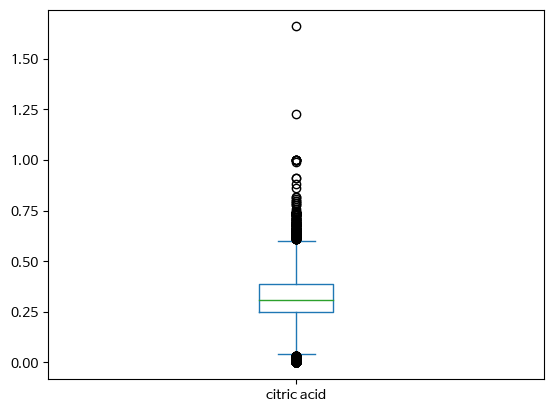

In [35]:
wine['citric acid'].plot(kind='box')

In [36]:
print_outlier(wine,'citric acid')

이상치 기준값 : 0.04,0.6

citric acid 변수 이상치

[0.01, 0.0, 0.99, 0.02, 0.74, 0.0, 0.01, 0.0, 0.03, 0.69, 0.0, 0.0, 0.01, 0.66, 0.65, 0.66, 0.01, 0.0, 0.66, 0.66, 0.62, 0.72, 0.0, 0.65, 0.74, 0.68, 0.01, 1.0, 1.66, 0.0, 0.01, 0.71, 0.68, 0.62, 0.0, 0.74, 0.02, 0.0, 0.0, 0.0, 0.0, 0.65, 0.73, 0.03, 0.64, 0.74, 0.74, 0.0, 0.02, 0.7, 0.0, 1.0, 0.01, 0.02, 0.64, 0.64, 0.0, 0.0, 0.02, 0.66, 0.68, 0.0, 0.0, 0.0, 0.74, 0.74, 0.74, 0.0, 0.0, 0.0, 0.0, 0.74, 0.0, 0.66, 0.74, 0.0, 0.0, 0.0, 0.73, 0.0, 0.62, 0.64, 0.82, 0.0, 0.0, 0.0, 0.68, 0.02, 0.03, 0.03, 0.0, 0.03, 0.0, 0.65, 0.64, 0.7, 0.0, 0.66, 0.02, 0.65, 0.0, 0.64, 0.0, 0.02, 0.01, 0.0, 0.02, 0.02, 0.0, 0.0, 0.0, 0.65, 0.02, 0.62, 0.01, 1.0, 0.02, 0.68, 0.81, 0.0, 0.0, 0.0, 0.63, 0.0, 0.68, 0.76, 0.0, 0.0, 0.74, 0.74, 0.0, 0.65, 0.63, 0.0, 0.65, 0.0, 0.0, 0.02, 0.62, 0.02, 0.02, 1.0, 0.62, 0.02, 0.0, 0.0, 0.79, 0.03, 0.74, 0.02, 0.8, 0.66, 0.0, 0.66, 0.0, 0.02, 0.0, 0.91, 0.02, 0.03, 0.03, 0.69, 0.71, 0.01, 0.0, 0.65, 0.03, 0.0, 0.0, 0.0, 0.02, 

* residual sugar : 잔당

In [37]:
wine['residual sugar'].describe()

count    5497.000000
mean        5.438075
std         4.756676
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

In [39]:
wine['residual sugar'].unique()

array([ 6.8 ,  2.4 ,  2.  ,  6.  ,  9.5 ,  9.7 ,  1.5 , 11.8 , 18.3 ,
       11.6 ,  0.9 ,  1.1 ,  6.85,  1.  ,  2.6 ,  7.  ,  2.1 ,  4.8 ,
        7.5 , 10.5 ,  1.7 ,  1.2 ,  2.5 ,  3.9 ,  2.2 , 15.  ,  1.6 ,
       16.  ,  2.3 , 13.  , 10.6 ,  3.8 ,  7.9 , 11.9 , 14.4 ,  7.1 ,
        1.4 , 12.8 ,  4.2 , 15.4 , 11.1 , 13.6 ,  1.8 ,  6.1 , 14.6 ,
        5.3 ,  2.9 , 12.9 ,  3.6 ,  2.7 , 16.8 ,  1.9 , 14.9 , 11.  ,
        7.05,  7.8 , 17.85,  1.45,  1.3 ,  4.1 ,  9.1 ,  2.8 ,  4.5 ,
        3.3 ,  8.2 , 12.7 , 14.2 ,  4.7 , 14.3 , 10.4 , 19.35,  5.4 ,
        6.3 ,  5.  ,  9.25,  4.75, 16.9 , 12.6 ,  5.9 ,  8.9 , 13.65,
        3.7 ,  4.9 , 10.2 ,  9.9 , 18.1 ,  6.2 ,  7.45,  0.8 ,  8.25,
        5.45,  4.6 , 18.75, 18.  , 17.2 ,  6.4 ,  8.6 ,  9.3 , 15.5 ,
        8.3 , 13.8 , 12.4 , 18.6 ,  7.7 ,  3.4 ,  5.5 ,  5.7 ,  6.6 ,
        8.5 , 17.3 ,  3.65,  1.25, 10.7 , 19.8 ,  3.1 ,  7.4 , 16.65,
        8.  , 18.95, 14.  ,  4.  ,  8.8 ,  9.4 ,  5.6 ,  4.55, 11.2 ,
       10.1 ,  7.2 ,

<Axes: >

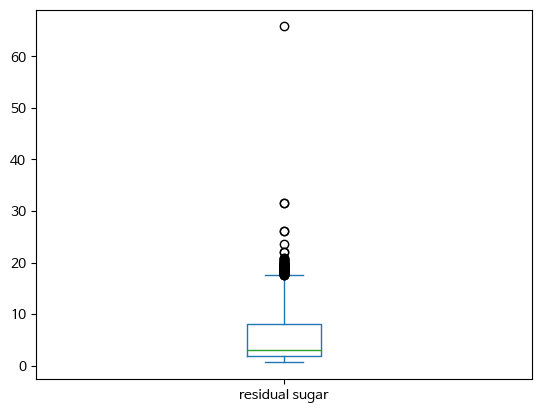

In [40]:
wine['residual sugar'].plot(kind='box')

In [41]:
print_outlier(wine,'residual sugar')

이상치 기준값 : -7.65,17.55

residual sugar 변수 이상치

[18.3, 17.85, 19.35, 18.1, 18.75, 18.0, 18.6, 19.8, 18.95, 17.8, 19.8, 17.9, 20.2, 17.8, 17.8, 19.3, 18.75, 19.25, 18.15, 19.9, 18.1, 17.8, 18.05, 18.8, 19.1, 19.8, 65.8, 19.5, 18.15, 19.8, 18.95, 17.75, 19.95, 18.15, 18.35, 18.5, 17.85, 17.8, 18.05, 18.95, 18.35, 18.3, 18.1, 17.8, 19.95, 20.7, 20.2, 18.2, 26.05, 18.15, 18.1, 18.1, 17.8, 19.3, 19.45, 17.75, 18.15, 26.05, 17.85, 19.45, 17.85, 19.3, 17.6, 17.55, 17.8, 20.3, 20.8, 20.8, 19.4, 18.05, 17.8, 23.5, 17.8, 20.15, 18.0, 18.1, 22.0, 31.6, 19.25, 17.55, 31.6, 17.7, 18.4, 17.95, 19.25, 19.3, 18.15, 18.2, 17.85, 18.75, 17.75, 19.6, 17.95, 20.7, 17.75, 20.4, 18.75, 17.8, 19.5, 18.9, 18.8, 19.4, 22.0, 18.35, 17.8, 18.15]

residual sugar 변수 이상치 개수 : 106개


* chlorides : 염화물

In [42]:
wine['chlorides'].describe()

count    5497.000000
mean        0.055808
std         0.034653
min         0.009000
25%         0.038000
50%         0.047000
75%         0.064000
max         0.610000
Name: chlorides, dtype: float64

In [43]:
wine['chlorides'].unique()

array([0.042, 0.067, 0.057, 0.046, 0.059, 0.032, 0.051, 0.041, 0.044,
       0.049, 0.038, 0.081, 0.043, 0.097, 0.029, 0.073, 0.083, 0.039,
       0.064, 0.086, 0.027, 0.045, 0.063, 0.065, 0.095, 0.047, 0.122,
       0.11 , 0.05 , 0.078, 0.054, 0.055, 0.113, 0.053, 0.079, 0.214,
       0.125, 0.036, 0.117, 0.048, 0.026, 0.093, 0.037, 0.031, 0.06 ,
       0.114, 0.019, 0.035, 0.033, 0.03 , 0.034, 0.08 , 0.028, 0.091,
       0.104, 0.07 , 0.056, 0.052, 0.074, 0.022, 0.105, 0.062, 0.024,
       0.085, 0.103, 0.387, 0.02 , 0.29 , 0.014, 0.088, 0.077, 0.255,
       0.205, 0.058, 0.04 , 0.082, 0.121, 0.023, 0.066, 0.1  , 0.071,
       0.118, 0.061, 0.075, 0.169, 0.09 , 0.094, 0.087, 0.068, 0.025,
       0.414, 0.144, 0.092, 0.128, 0.154, 0.089, 0.133, 0.076, 0.102,
       0.152, 0.208, 0.069, 0.119, 0.021, 0.226, 0.271, 0.124, 0.072,
       0.098, 0.209, 0.172, 0.132, 0.185, 0.157, 0.61 , 0.17 , 0.107,
       0.25 , 0.111, 0.084, 0.136, 0.115, 0.127, 0.173, 0.243, 0.201,
       0.149, 0.123,

<Axes: >

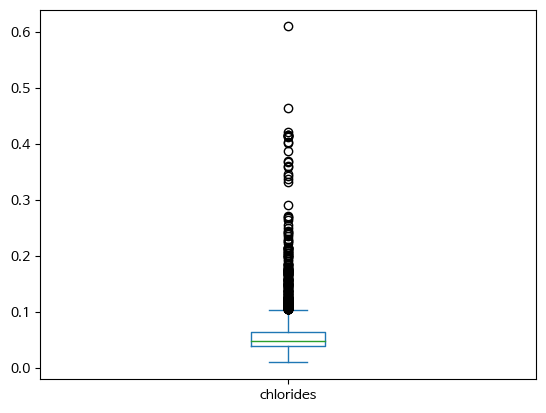

In [44]:
wine['chlorides'].plot(kind='box')

In [45]:
print_outlier(wine,'chlorides')

이상치 기준값 : -0.001,0.103

chlorides 변수 이상치

[0.122, 0.11, 0.122, 0.113, 0.214, 0.125, 0.1169999999999999, 0.114, 0.104, 0.105, 0.387, 0.29, 0.255, 0.205, 0.121, 0.118, 0.1689999999999999, 0.414, 0.144, 0.128, 0.154, 0.133, 0.152, 0.208, 0.119, 0.104, 0.226, 0.271, 0.124, 0.105, 0.209, 0.172, 0.132, 0.185, 0.114, 0.157, 0.61, 0.17, 0.107, 0.25, 0.157, 0.414, 0.111, 0.119, 0.132, 0.111, 0.136, 0.124, 0.107, 0.115, 0.127, 0.173, 0.243, 0.201, 0.149, 0.123, 0.401, 0.104, 0.1119999999999999, 0.105, 0.107, 0.114, 0.146, 0.114, 0.111, 0.106, 0.222, 0.1369999999999999, 0.415, 0.1969999999999999, 0.174, 0.358, 0.1119999999999999, 0.157, 0.236, 0.212, 0.161, 0.175, 0.166, 0.12, 0.11, 0.226, 0.1159999999999999, 0.126, 0.147, 0.1119999999999999, 0.104, 0.2, 0.11, 0.176, 0.109, 0.186, 0.119, 0.16, 0.122, 0.205, 0.104, 0.11, 0.171, 0.152, 0.147, 0.156, 0.174, 0.107, 0.123, 0.1169999999999999, 0.114, 0.158, 0.4029999999999999, 0.27, 0.107, 0.184, 0.119, 0.132, 0.111, 0.369, 0.337, 0.106, 0.109, 0.118, 

* free sulfur dioxide : 독립 이산화항

In [46]:
wine['free sulfur dioxide'].describe()

count    5497.000000
mean       30.417682
std        17.673881
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

In [47]:
wine['free sulfur dioxide'].unique()

array([  9. ,  10. ,  21. ,  29. ,  32. ,  17. ,  18. ,  40. ,  57. ,
        36. ,  31. ,  39. ,  54. ,  12. ,  30. ,  13. ,  34. ,  20. ,
        42. ,   6. ,  61. ,   5. ,  69. ,  38. ,  45. ,  68. , 110. ,
        41. ,   7. ,  48.5,  33. ,  55. ,  15. ,  66. ,  37. ,  62. ,
        28. ,  58. ,   3. ,  50. ,  51. ,  22. ,  52. ,  43.5,   4. ,
        27. ,  16. ,  53. ,  24. ,  14. ,  19. ,  26. ,  23. ,  67. ,
        60. ,  73. ,  49. ,  75. ,  59. ,   8. ,  48. ,  44. ,  56. ,
        35. ,  25. , 108. ,  11. ,  70. ,  96. ,  63. ,  47. ,  46. ,
        65. ,  43. ,  74. , 105. ,  87. ,  86. ,   2. , 138.5,  83. ,
        78. ,  85. ,  81. ,  64. ,  60.5, 146.5,  28.5, 131. , 124. ,
         1. ,   5.5,  73.5,  98. ,  76. ,  40.5,  77. ,  39.5,  52.5,
        61.5,  41.5,  72. ,  79.5,  38.5,  42.5, 101. ,  11.5,  71. ,
        50.5,  79. , 128. ,  59.5,  35.5,  64.5,  82. , 118.5,  44.5,
        15.5, 112. ,  77.5,  89. ,  97. ,  19.5,  30.5,  95. ,  88. ,
       289. ])

<Axes: >

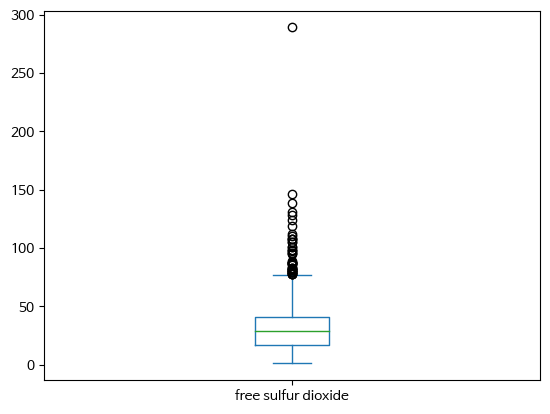

In [48]:
wine['free sulfur dioxide'].plot(kind='box')

In [49]:
print_outlier( wine, 'free sulfur dioxide' )

이상치 기준값 : -19.0,77.0

free sulfur dioxide 변수 이상치

[110.0, 108.0, 96.0, 105.0, 87.0, 86.0, 138.5, 83.0, 78.0, 85.0, 81.0, 146.5, 131.0, 124.0, 98.0, 87.0, 105.0, 98.0, 79.5, 81.0, 101.0, 79.0, 128.0, 78.0, 83.0, 96.0, 108.0, 79.5, 87.0, 81.0, 82.0, 83.0, 118.5, 112.0, 77.5, 101.0, 78.0, 81.0, 108.0, 87.0, 89.0, 79.5, 79.0, 97.0, 95.0, 88.0, 289.0]

free sulfur dioxide 변수 이상치 개수 : 47개


* total sulfur dioxide : 총 이산화황

In [50]:
wine['total sulfur dioxide'].describe()

count    5497.000000
mean      115.566491
std        56.288223
min         6.000000
25%        78.000000
50%       118.000000
75%       155.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

In [51]:
wine['total sulfur dioxide'].unique()

array([ 84. ,  42. , 138. , 108. , 178. ,  50. ,  87. , 193. , 142. ,
       220. , 109. ,  82. , 144. ,  72. , 149. , 145. , 128. ,  76. ,
       165. , 157. , 100. ,  97. ,  43. ,  30. ,  96. ,  77. , 115. ,
       106. , 186. ,  22. , 160. , 209. , 129. , 116. ,  89. , 124. ,
       198. , 168. , 224. ,  13. ,  37. ,  95. , 212. , 114. ,  49. ,
       132. , 231. , 102. , 163. , 181. ,  94. , 113. ,  70. , 134. ,
        12. , 173. , 126. , 162. ,  10. , 245. , 188. , 221. ,  65. ,
       111. , 185. ,  44. , 184. , 119. , 171. ,  98. ,  46. , 107. ,
        55. , 150. ,  21. , 161. ,  35. , 187. , 164. ,  61. ,  92. ,
       213. , 131. , 103. , 207. , 130. , 141. ,  67. , 158. , 174. ,
       101. ,  48. , 190. ,  53. , 215. , 121. , 170. ,  28. , 118. ,
        39. , 189. ,  54. , 122. , 167. ,  75. ,  64. , 151. ,  73. ,
        88. , 202. , 205. , 104. , 137. , 196. , 255. , 183. ,  33. ,
        23. ,  41. , 152. , 135. ,  19. ,  31. ,  91. , 200. ,  18. ,
        29. , 172. ,

<Axes: >

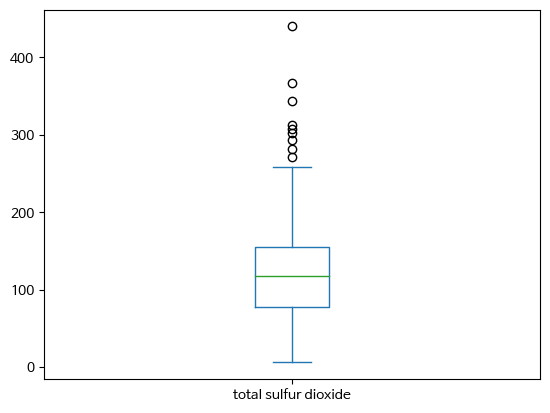

In [53]:
wine['total sulfur dioxide'].plot(kind='box')

In [54]:
print_outlier(wine,'total sulfur dioxide')

이상치 기준값 : -37.5,270.5

total sulfur dioxide 변수 이상치

[272.0, 307.5, 313.0, 344.0, 366.5, 303.0, 282.0, 294.0, 440.0]

total sulfur dioxide 변수 이상치 개수 : 9개


* density : 밀도

In [56]:
wine['density'].describe()

count    5497.000000
mean        0.994673
std         0.003014
min         0.987110
25%         0.992300
50%         0.994800
75%         0.996930
max         1.038980
Name: density, dtype: float64

In [57]:
wine['density'].unique()

array([0.99432 , 0.9969  , 0.99176 , 0.9939  , 0.9955  , 0.9932  ,
       0.9928  , 0.99624 , 1.      , 0.99775 , 0.99007 , 0.991   ,
       0.992   , 0.99304 , 0.9996  , 0.9952  , 0.9975  , 0.99074 ,
       0.9966  , 0.9972  , 0.9938  , 0.99586 , 0.99112 , 0.99371 ,
       0.99824 , 0.99035 , 0.9927  , 0.9978  , 0.9914  , 0.993   ,
       0.99884 , 0.9986  , 0.99705 , 0.9981  , 0.9936  , 0.98954 ,
       0.99664 , 0.9994  , 0.99437 , 0.99666 , 0.998   , 0.99639 ,
       0.99158 , 0.9902  , 0.9968  , 1.00369 , 0.99313 , 0.9977  ,
       0.98819 , 0.99118 , 1.0003  , 0.99459 , 0.98998 , 0.99572 ,
       0.99362 , 0.9892  , 0.99378 , 0.99544 , 0.99408 , 0.9984  ,
       0.99882 , 0.9922  , 0.99    , 0.9983  , 0.99636 , 0.9935  ,
       0.99851 , 0.98962 , 0.99125 , 0.99097 , 0.9948  , 0.99084 ,
       0.99058 , 0.99592 , 0.9908  , 0.98956 , 0.99652 , 0.9913  ,
       0.99256 , 0.996   , 0.9954  , 0.99044 , 0.99535 , 0.9912  ,
       0.9991  , 0.99033 , 0.99335 , 0.99164 , 0.99002 , 1.001

<Axes: >

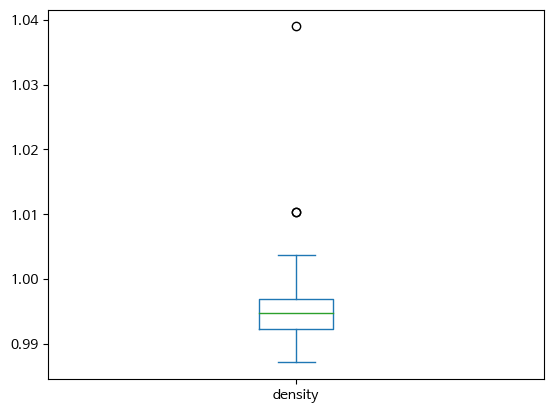

In [58]:
wine['density'].plot(kind='box')

In [59]:
print_outlier(wine,'density')

이상치 기준값 : 0.985,1.004

density 변수 이상치

[1.03898, 1.0103, 1.0103]

density 변수 이상치 개수 : 3개


* pH : 수소 이온 농도

In [60]:
wine['pH'].describe()

count    5497.000000
mean        3.219502
std         0.160713
min         2.740000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [61]:
wine['pH'].unique()

array([3.44, 3.19, 3.05, 3.26, 3.04, 3.08, 3.3 , 3.07, 2.89, 3.32, 3.03,
       3.13, 3.1 , 3.21, 3.17, 3.06, 3.36, 3.11, 3.41, 3.34, 3.24, 3.15,
       3.27, 3.37, 3.16, 3.47, 3.09, 3.29, 3.58, 3.28, 3.38, 3.25, 3.22,
       3.14, 3.18, 2.95, 3.31, 3.2 , 3.4 , 3.35, 3.61, 3.52, 3.48, 3.02,
       3.45, 2.97, 3.12, 3.01, 3.  , 3.39, 2.86, 3.6 , 3.54, 3.67, 3.23,
       3.42, 3.5 , 2.99, 3.33, 3.51, 2.94, 3.46, 2.98, 2.92, 2.9 , 3.53,
       3.85, 3.66, 3.56, 2.96, 2.88, 3.43, 3.9 , 3.49, 3.63, 3.57, 3.59,
       4.01, 3.55, 2.93, 3.65, 2.74, 3.71, 2.91, 2.83, 2.85, 3.8 , 2.87,
       3.74, 3.68, 3.72, 2.82, 3.62, 2.8 , 3.82, 3.75, 3.69, 3.81, 3.79,
       3.77, 2.84, 3.76, 2.79, 2.77, 3.78, 3.7 , 3.64])

<Axes: >

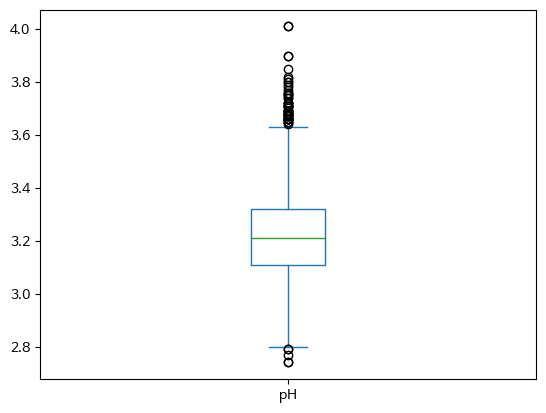

In [62]:
wine['pH'].plot(kind='box')

In [63]:
print_outlier(wine,'pH')

이상치 기준값 : 2.795,3.635

pH 변수 이상치

[3.67, 3.85, 3.66, 3.9, 4.01, 3.65, 2.74, 3.71, 3.8, 3.74, 3.71, 3.71, 3.68, 3.66, 3.9, 3.72, 3.66, 3.67, 3.74, 4.01, 3.82, 3.75, 3.8, 3.69, 2.74, 3.81, 3.68, 3.79, 3.65, 3.77, 3.66, 3.66, 3.68, 3.66, 3.72, 3.68, 3.76, 3.66, 3.66, 3.69, 3.67, 3.69, 3.72, 3.69, 3.75, 2.79, 3.71, 2.77, 3.75, 3.68, 3.78, 3.72, 3.7, 2.79, 3.67, 3.65, 3.76, 3.68, 3.64, 3.69]

pH 변수 이상치 개수 : 60개


#### sulphates : 황산염

In [ ]:
wine[ 'sulphates' ].describe()

count    5497.000000
mean        0.530524
std         0.149396
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

In [ ]:
wine[ 'sulphates' ].unique()

array([0.44, 0.59, 0.52, 0.5 , 0.43, 0.66, 0.46, 0.49, 0.41, 0.53, 0.3 ,
       0.4 , 0.73, 0.33, 1.03, 0.84, 0.55, 0.75, 0.57, 0.64, 0.6 , 0.51,
       0.67, 0.45, 0.58, 0.31, 0.68, 0.56, 0.77, 0.81, 0.39, 0.42, 0.69,
       0.37, 0.62, 0.34, 0.61, 0.47, 0.54, 0.65, 0.48, 0.35, 0.63, 0.71,
       0.79, 0.82, 0.38, 0.32, 0.78, 0.74, 0.7 , 0.36, 0.92, 0.72, 0.9 ,
       0.28, 0.76, 0.98, 0.87, 0.83, 1.33, 0.99, 0.96, 0.86, 0.97, 0.91,
       0.88, 0.27, 1.18, 1.02, 2.  , 0.85, 0.29, 0.8 , 1.04, 1.01, 1.34,
       0.94, 0.89, 1.13, 1.06, 1.14, 1.36, 0.25, 0.26, 1.17, 1.08, 0.93,
       1.05, 1.07, 1.95, 0.95, 1.11, 1.12, 1.15, 1.1 , 1.61, 1.59, 1.98,
       1.28, 1.16, 1.62, 1.56, 0.22, 1.  , 1.09])

<Axes: >

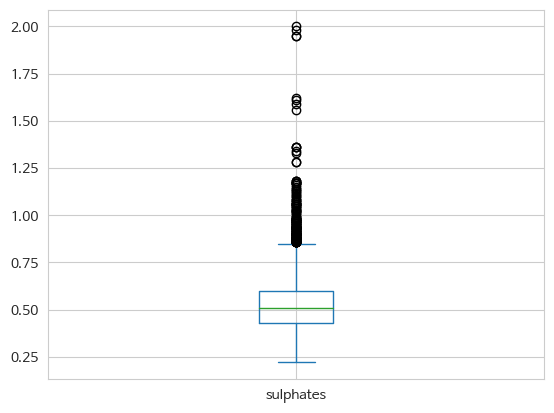

In [ ]:
wine[ 'sulphates' ].plot( kind = 'box' )

In [ ]:
print_outlier( wine, 'sulphates' )

이상치 기준값 : 0.175, 0.855

sulphates 변수 이상치

[1.03, 0.92, 0.9, 0.98, 0.87, 1.33, 0.99, 0.96, 0.86, 0.97, 0.91, 0.88, 1.18, 1.02, 0.86, 0.91, 0.88, 2.0, 1.04, 0.88, 1.01, 0.87, 1.34, 0.94, 0.94, 1.01, 0.87, 0.92, 0.86, 0.94, 0.89, 0.88, 0.98, 1.13, 1.06, 0.96, 0.89, 1.02, 1.14, 0.97, 0.89, 0.87, 1.06, 1.36, 1.17, 1.08, 0.93, 1.05, 1.05, 1.08, 1.13, 1.07, 0.86, 0.98, 0.97, 0.92, 0.86, 0.9, 0.91, 0.87, 1.95, 1.06, 0.87, 0.93, 1.18, 0.86, 0.95, 1.11, 0.98, 0.88, 1.12, 0.87, 1.15, 1.02, 0.86, 1.1, 1.61, 1.17, 0.93, 0.88, 0.93, 0.9, 0.86, 0.97, 0.93, 0.99, 0.9, 1.08, 0.96, 0.9, 0.88, 0.91, 0.86, 0.92, 1.1, 0.9, 1.36, 0.88, 0.9, 0.98, 1.59, 0.9, 1.04, 0.9, 1.17, 0.9, 0.88, 0.88, 1.05, 0.94, 0.89, 0.97, 1.98, 0.93, 0.95, 0.88, 0.91, 0.89, 1.18, 1.06, 1.28, 0.89, 1.16, 1.62, 1.07, 0.94, 0.87, 1.36, 1.56, 1.28, 0.95, 0.96, 0.87, 1.95, 1.0, 0.96, 0.95, 0.86, 0.86, 0.87, 0.92, 0.98, 0.94, 1.06, 1.09, 1.17, 0.97, 0.99, 0.87, 0.89, 0.95, 1.03, 0.91, 0.87, 1.14, 0.97, 0.93, 1.17, 0.9, 0.86, 0.92]

sulph

* sulphates 변수 이상치는 황산염에 해당함으로 별다른 처리없이 분석에 사용한다.

#### alcohol : 도수

In [ ]:
wine[ 'alcohol' ].describe()

count    5497.000000
mean       10.504918
std         1.194524
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [ ]:
wine[ 'alcohol' ].unique()

array([10.2       ,  9.5       , 10.9       , 10.8       , 12.        ,
        9.6       , 10.        ,  8.7       ,  9.3       , 12.7       ,
       11.9       , 10.5       , 12.2       ,  9.7       , 10.55      ,
        9.8       ,  9.9       , 11.2       , 11.8       , 12.6       ,
        9.        , 10.4       ,  8.6       , 10.3       , 12.5       ,
       10.6       , 10.1       , 11.5       ,  9.1       , 13.        ,
       13.7       , 12.4       , 13.1       ,  9.4       , 11.1       ,
        8.9       , 11.6       , 11.45      , 11.        , 12.1       ,
       11.3       ,  9.2       , 10.7       , 10.46666667, 11.4       ,
       12.3       ,  8.8       , 11.7       , 13.2       ,  8.5       ,
       12.8       , 13.8       ,  9.25      , 12.9       , 13.5       ,
       11.65      ,  8.4       , 13.3       , 11.55      ,  9.73333333,
       11.05      ,  9.53333333, 13.6       , 14.        ,  9.95      ,
       10.98      , 13.4       , 11.33333333, 13.9       , 12.75

<Axes: >

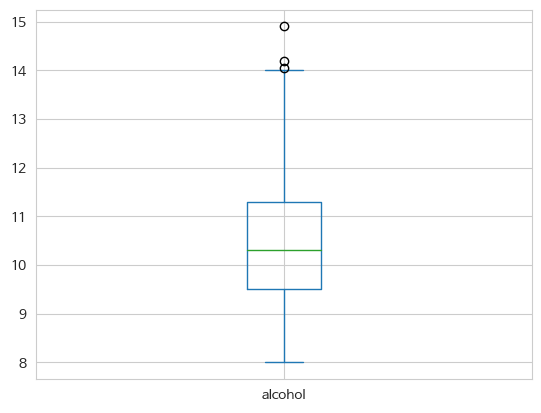

In [ ]:
wine[ 'alcohol' ].plot( kind = 'box' )

In [ ]:
print_outlier( wine, 'alcohol' )

이상치 기준값 : 6.8, 14.0

alcohol 변수 이상치

[14.9, 14.05, 14.2]

alcohol 변수 이상치 개수 : 3개


* alcohol 변수 이상치는 도수에 해당함으로 별다른 처리없이 분석에 사용한다.

### EDA

#### 기초 통계

In [64]:
wine[['quality','fixed acidity','volatile acidity','citric acid']].describe()

,quality,fixed acidity,volatile acidity,citric acid
count,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543
std,0.870311,1.287579,0.163224,0.145104
min,3.000000,3.800000,0.080000,0.000000
25%,5.000000,6.400000,0.230000,0.250000
50%,6.000000,7.000000,0.290000,0.310000
75%,6.000000,7.700000,0.400000,0.390000
max,9.000000,15.900000,1.580000,1.660000


In [65]:
wine[ [ 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide' ] ].describe()

,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
count,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.438075,0.055808,30.417682,115.566491
std,4.756676,0.034653,17.673881,56.288223
min,0.600000,0.009000,1.000000,6.000000
25%,1.800000,0.038000,17.000000,78.000000
50%,3.000000,0.047000,29.000000,118.000000
75%,8.100000,0.064000,41.000000,155.000000
max,65.800000,0.610000,289.000000,440.000000


In [66]:
wine[ [ 'density', 'pH', 'sulphates', 'alcohol' ] ].describe()

,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000
mean,0.994673,3.219502,0.530524,10.504918
std,0.003014,0.160713,0.149396,1.194524
min,0.987110,2.740000,0.220000,8.000000
25%,0.992300,3.110000,0.430000,9.500000
50%,0.994800,3.210000,0.510000,10.300000
75%,0.996930,3.320000,0.600000,11.300000
max,1.038980,4.010000,2.000000,14.900000


* 성분별 데이터 분포

In [67]:
numerical_variable = list(set(wine.columns)-set(['type']))
numerical_variable = np.sort(numerical_variable)

print('수치형 변수 목록\n')
for string in numerical_variable:
  print(f'{string}\t')
print(f'\n{len(numerical_variable)}개')

수치형 변수 목록

alcohol	
chlorides	
citric acid	
density	
fixed acidity	
free sulfur dioxide	
pH	
quality	
residual sugar	
sulphates	
total sulfur dioxide	
volatile acidity	

12개


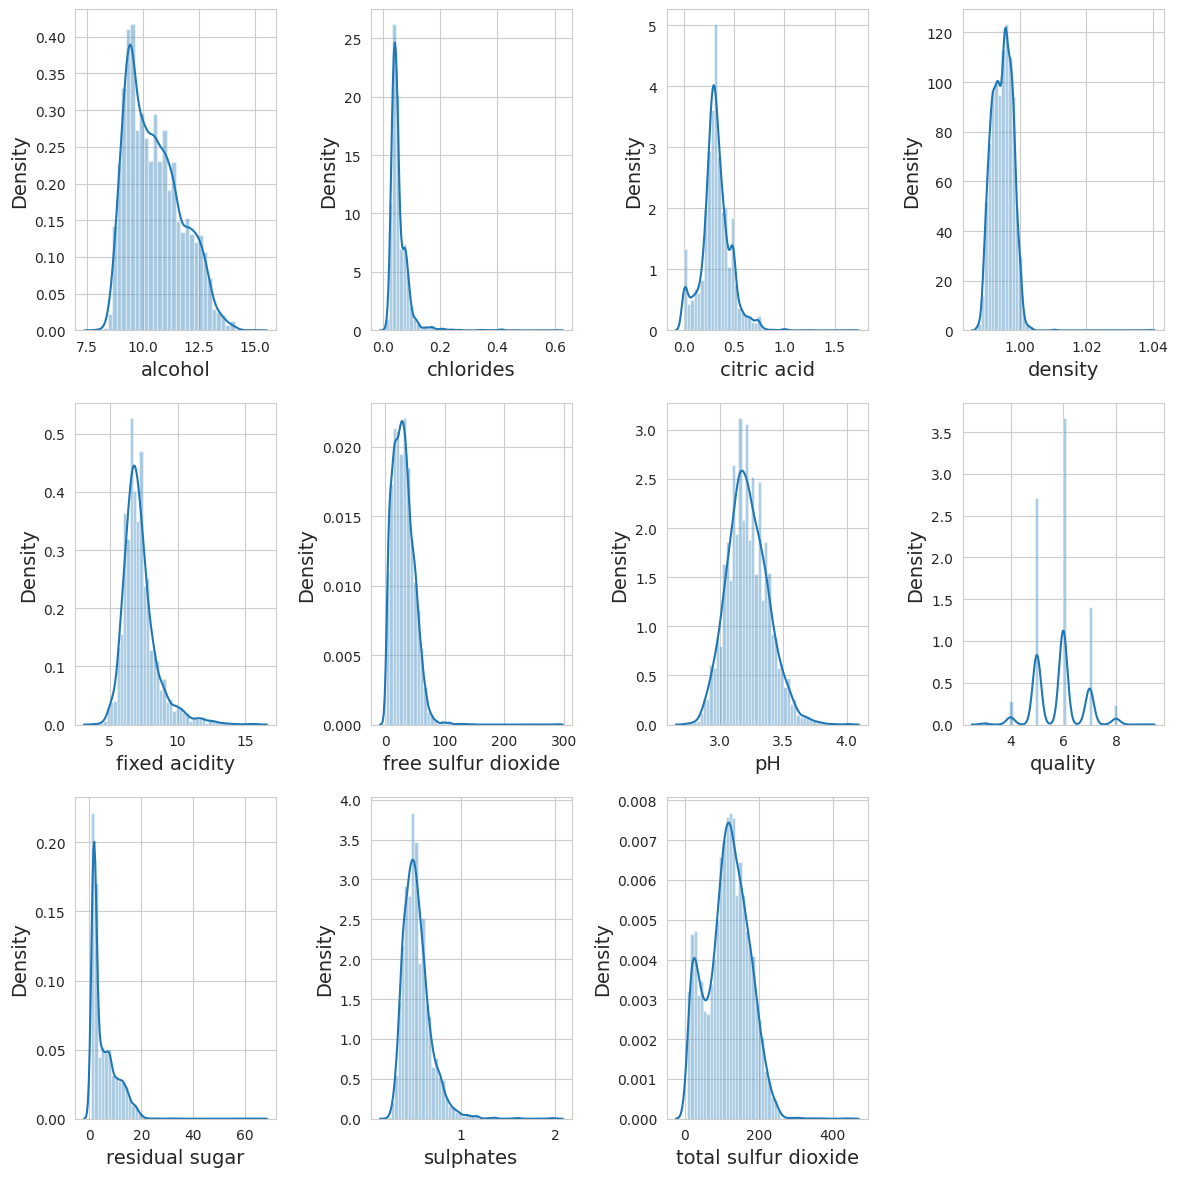

In [68]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,12))
for i in range(1, len(numerical_variable)):
  plt.subplot(3,4,i)
  sns.distplot(wine.loc[:,numerical_variable[i-1]])
plt.tight_layout()
plt.show()